### Problem description:

classify images from a dataset of tens of thousand of images in to 10 different categories.

**Dataset**

- consisting of a training set of 60,000 examples and a test set of 10,000 examples
- Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
- https://www.kaggle.com/zalando-research/fashionmnist
- https://github.com/zalandoresearch/fashion-mnist

**Labels**

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

**Architecture**

- CNN
- output layer with 10 units

**Libraries**
- tensorflow
- keras
- matplotlib

**Performance**
- training_accuracy = 95%
- test_accuracy = 90%

## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

1.14.0


In [2]:
%config IPCompleter.greedy=True

### Define call back function

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc') >= .999):
            print("\n Reached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

### Load Fashion-MNIST dataset

In [4]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("shape of input images in the training set: {}".format(x_train.shape))
print("shape of output labels in the trainint set:{}".format(y_train.shape))
print("shape of test images: {}".format(x_test.shape))
print("shape of test labels: {}".format(y_test.shape))

shape of input images in the training set: (60000, 28, 28)
shape of output labels in the trainint set:(60000,)
shape of test images: (10000, 28, 28)
shape of test labels: (10000,)


### Analyze data before normalizing

Training label: 2
[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 

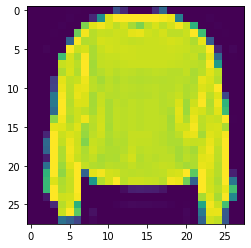

In [6]:
# Note that each pixels contains a number between 0 and 255
index = 7
plt.imshow(x_train[index])
print("Training label: {}".format(y_train[index]))
print(x_train[index])

### Normalize and pre-process data

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
# After normalizing the data all the image pixels should be between 0 and 1
X_train = x_train / 255.0

x_test = x_test.reshape(10000, 28, 28, 1)
# After normalizing the data all the image pixels should be between 0 and 1
X_test = x_test / 255.0

Y_train = y_train
Y_test = y_test

### Analyze the normalized data

Training label: 2
[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         

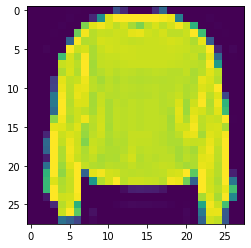

In [8]:
normal_index = 7
plt.imshow(np.squeeze(X_train[index]))

print("Training label: {}".format(y_train[index]))
print(np.squeeze(X_train[index]))

### Define, compile and train the NN model

In [16]:
def train_fashion_mnist():
    # initialize the callback class created above
    callback = myCallback()
    
    # Sequential model with conv2D layer followed by MaxPooling, Flatten and Dense layers
    model = tf.keras.models.Sequential([
        # convolutional layer with 64 filters of size (3,3)
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
        # MaxPooling layer of size (2, 2). It picks up the most activated pixel in a grid of (2, 2)
        tf.keras.layers.MaxPooling2D(2, 2),
        # convolutional layer with 32 filters of size (3,3)
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        # MaxPooling layer of size (2, 2). It picks up the most activated pixel in a grid of (2, 2)
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten layer that converts the image from MaxPooling layer in to a vector
        tf.keras.layers.Flatten(),
        # Dense layer with 128 units
        tf.keras.layers.Dense(128, activation='relu'),
        # output layer with 10 units
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Print the model summary
    print(model.summary())
    
    # train the model
    history = model.fit(X_train, Y_train, epochs=10, callbacks=[callback])
    
    # evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    
    # print the test accuracy
    print("test accuracy: {}".format(test_acc))
    
    return history, model

In [17]:
history, model = train_fashion_mnist()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

### Visualizing convolution and pooling layers

In [14]:
# print the first 100 labels from the test set
print(Y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Text(0.5, 87.0, 'orig image #5')

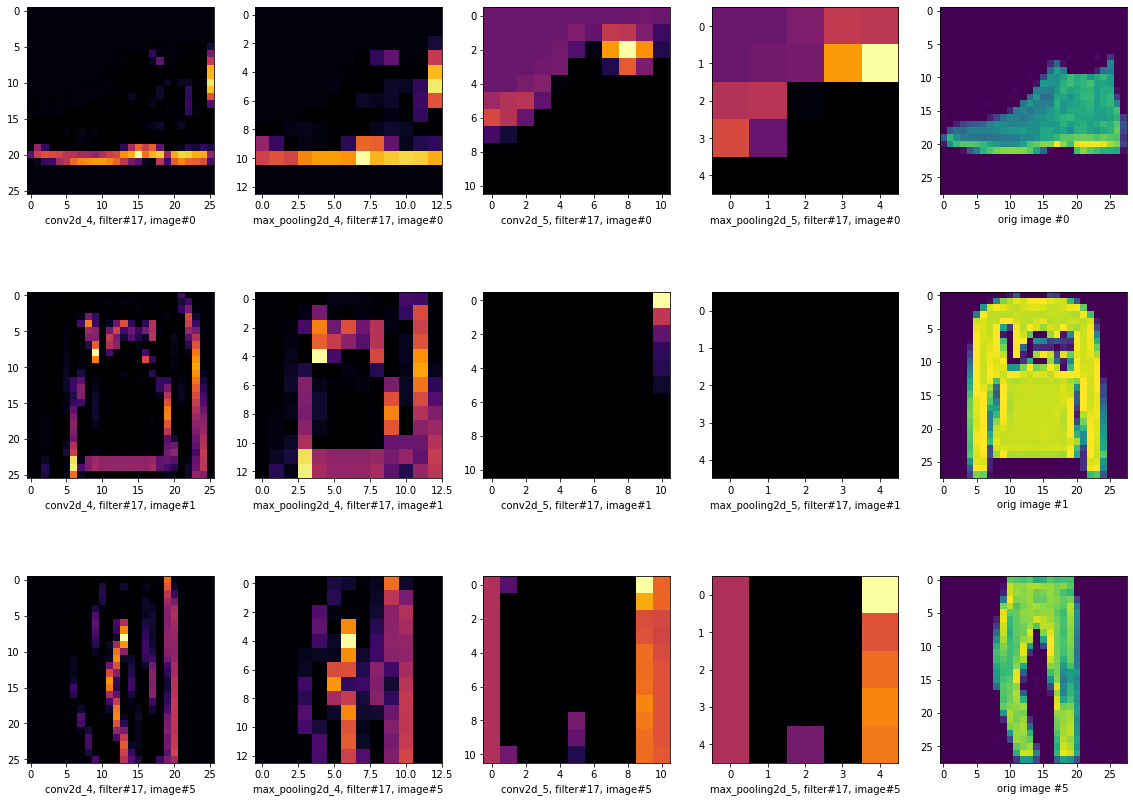

In [15]:
#def visualize_layer():
        
f, axis = plt.subplots(3, 5, figsize=(16,12))
plt.tight_layout()

FIRST_IMAGE = 0               # index of the first image for which the activation is to be analyzed.
SECOND_IMAGE = 1              # index of the second image
THIRD_IMAGE = 5               # index of the third image
CONVOLUTION_NUMBER = 17       # filter number

layer_outputs = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
# print(activation_model.summary())

# Loop through the first 4 layers of the activation_model
for x in range(0, 4):  
    # Activation of the xth layer on FIRST IMAGE the Filter 
    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axis[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axis[0,x].grid(False)
    axis[0,x].set_xlabel('{}, filter#{}, image#{}'.format(layer_names[x], CONVOLUTION_NUMBER, FIRST_IMAGE))
    
    f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axis[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axis[1,x].grid(False)
    axis[1,x].set_xlabel('{}, filter#{}, image#{}'.format(layer_names[x], CONVOLUTION_NUMBER, SECOND_IMAGE))
    
    f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axis[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axis[2,x].grid(False)
    axis[2,x].set_xlabel('{}, filter#{}, image#{}'.format(layer_names[x], CONVOLUTION_NUMBER, THIRD_IMAGE))
    
axis[0,4].imshow(np.squeeze(X_test[FIRST_IMAGE]))
axis[0,4].grid(False)
axis[0,4].set_xlabel('orig image #{}'.format(FIRST_IMAGE))

axis[1,4].imshow(np.squeeze(X_test[SECOND_IMAGE]))
axis[1,4].grid(False)
axis[1,4].set_xlabel('orig image #{}'.format(SECOND_IMAGE))

axis[2,4].imshow(np.squeeze(X_test[THIRD_IMAGE]))
axis[2,4].grid(False)
axis[2,4].set_xlabel('orig image #{}'.format(THIRD_IMAGE))